In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan-clean.csv")
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.0,360.0,1.0,Urban,Y,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
554,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
555,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
556,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [3]:
import numpy as np
df['Loan_Status'] = np.where(df['Loan_Status'] == "Y",1,0)
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.0,360.0,1.0,Urban,1,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


## How many outliers we have...

In [4]:
outliers_labels = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]

test_outliers = df[outliers_labels].copy()
for col in outliers_labels:
    q1 = np.quantile(test_outliers[col], 0.25)
    q3 = np.quantile(test_outliers[col], 0.75)
    iqr = q3 - q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    test_outliers = test_outliers[(test_outliers[col] >= minimum) & (test_outliers[col] <= maximum)]
 
print(df.shape[0] - test_outliers.shape[0])

156


## Box plots

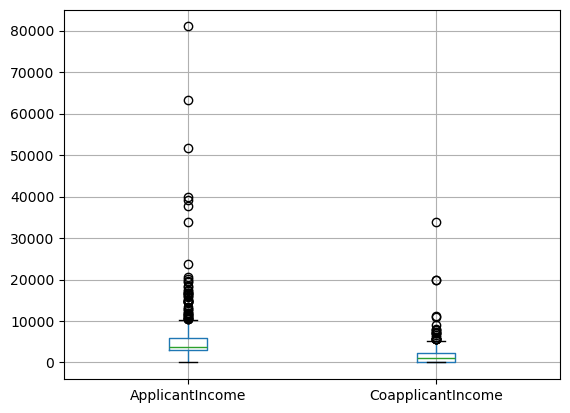

In [5]:
df.boxplot(column=["ApplicantIncome", "CoapplicantIncome"])
plt.show()

In [6]:
df.shape

(558, 15)

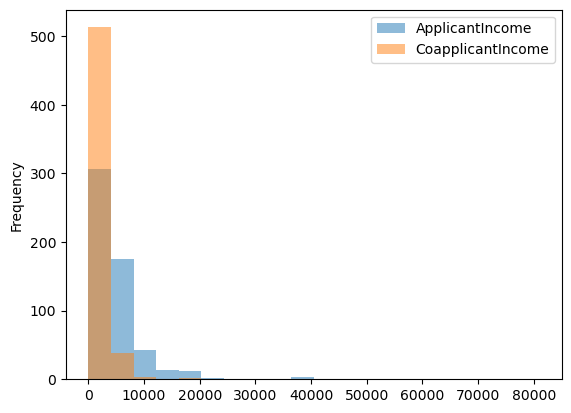

In [7]:
df[["ApplicantIncome", "CoapplicantIncome"]].plot.hist(alpha=0.5, bins=20)
plt.show()

In [8]:
q1 = np.quantile(df['ApplicantIncome'], 0.25)
q3 = np.quantile(df['ApplicantIncome'], 0.75)
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)

In [9]:
df= df[df['ApplicantIncome']<30000]

C:\Users\david.rodriguez\AppData\Local\Temp\ipykernel_13256\2080174054.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10152.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['ApplicantIncome'] > maximum), 'ApplicantIncome'] = maximum


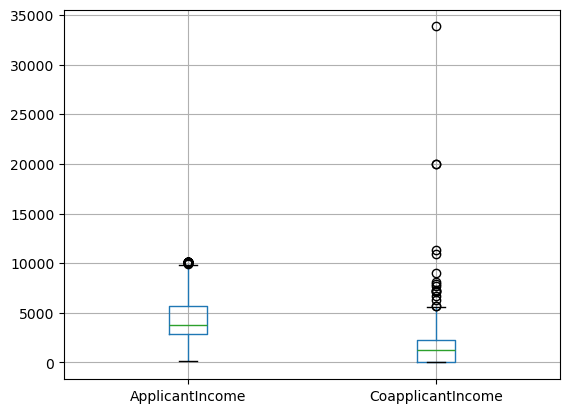

In [10]:
df.loc[(df['ApplicantIncome'] > maximum), 'ApplicantIncome'] = maximum
df.boxplot(column=["ApplicantIncome", "CoapplicantIncome"])
plt.show()

In [11]:
q1 = np.quantile(df['CoapplicantIncome'], 0.25)
q3 = np.quantile(df['CoapplicantIncome'], 0.75)
iqr = q3 - q1
 
maximum = q3 + (1.5 * iqr)

df.loc[(df['CoapplicantIncome'] > maximum), 'CoapplicantIncome'] = maximum


In [12]:
df= df[df['CoapplicantIncome']<6000]

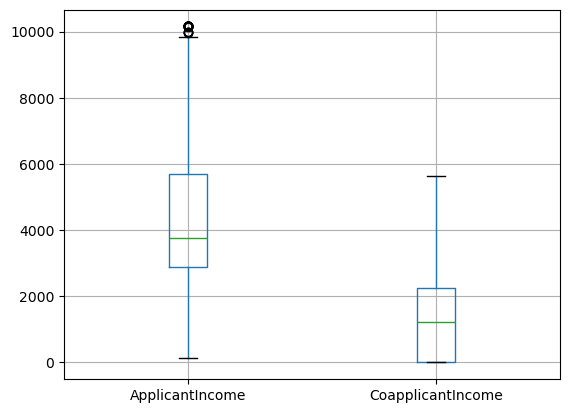

In [13]:

df.boxplot(column=["ApplicantIncome", "CoapplicantIncome"])
plt.show()

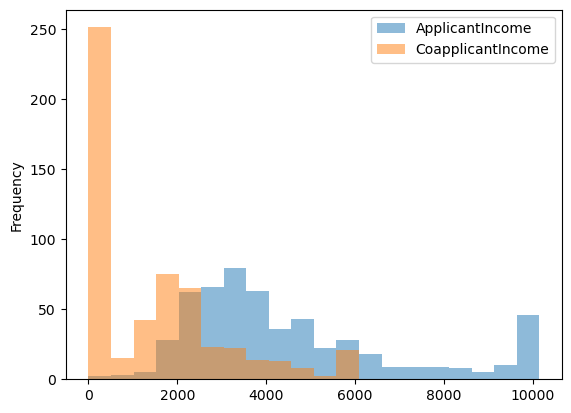

In [14]:
df[["ApplicantIncome", "CoapplicantIncome"]].plot.hist(alpha=0.5, bins=20)
plt.show()

In [15]:
df.shape

(551, 15)

In [16]:
x = df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']].values
y = df['LoanAmount'].values
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
model = sm.OLS(y, x).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.38e-79
Time:                        08:53:19   Log-Likelihood:                -2972.9
No. Observations:                 551   AIC:                             5954.
Df Residuals:                     547   BIC:                             5971.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3807     13.591     -1.352      0.1

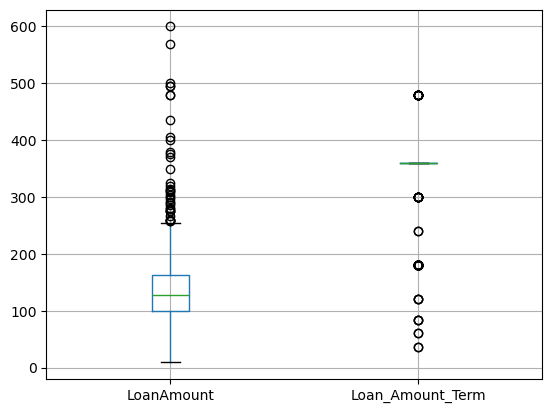

In [17]:
df.boxplot(column=["LoanAmount", "Loan_Amount_Term"])
plt.show()

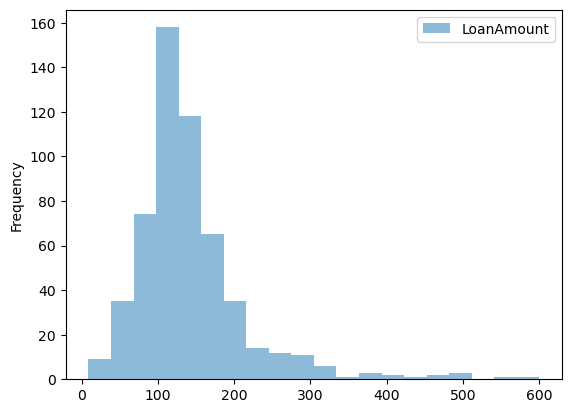

In [18]:
df[["LoanAmount"]].plot.hist(alpha=0.5, bins=20)
plt.show()

In [19]:
df[df['LoanAmount']>300]['LoanAmount'].count()

21

In [20]:
q1 = np.quantile(df["LoanAmount"], 0.25)
q3 = np.quantile(df["LoanAmount"], 0.75)
print(f"Q1: {q1}, Q3: {q3}")

iqr = q3 - q1
print(f"IQR: {iqr}")

maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)
print(f"Min: {minimum}, Max: {maximum}")

Q1: 100.0, Q3: 162.0
IQR: 62.0
Min: 7.0, Max: 255.0


In [21]:
df= df[df['LoanAmount']<300]
df['LoanAmount'] = np.where(df['LoanAmount'] >= maximum,maximum,df['LoanAmount'])

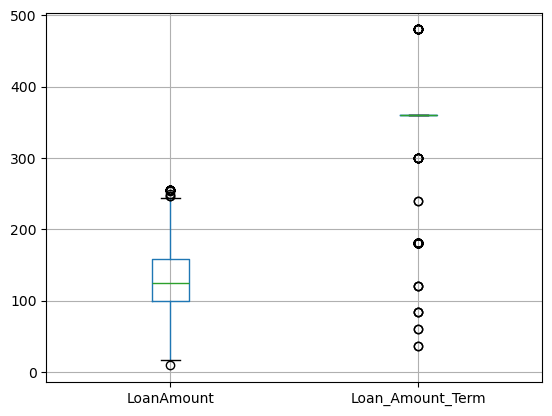

In [22]:
df.boxplot(column=["LoanAmount", "Loan_Amount_Term"])
plt.show()
